In [1]:
import numpy as np
import matplotlib.pyplot as plt

Encoder-length[cm] conversion factors

In [2]:
trolley_to_radius = 22.7 / 30000.0
rotate_to_phi = np.pi / 8000.0
vertical_to_z = 15.2 / 50000.0

Define column numbers

In [3]:
idx_trolley = 0
idx_rotate = 1
idx_vertical = 2
idx_bfx = 3
idx_bfx_std = 4
idx_bfy = 5
idx_bfy_std = 6
idx_bfz = 7
idx_bfz_std = 8
idx_b0_status = 9
idx_monitor = 10
idx_monitor_std = 11
idx_time = 12

Load the raw data

In [4]:
# Modify only here
data_name = '04-13-2022_15-08_x_calibrate'

data_path = 'data/calibration_runs/' + data_name
data = np.loadtxt(data_path + '/output.txt')

Split the B0 on and off data and create a difference data

In [5]:
data_on = data[::2]
data_off = data[1::2]

data_diff = data_on
data_diff[:, idx_bfx] = data_on[:, idx_bfx] - data_off[:, idx_bfx]
data_diff[:, idx_bfy] = data_on[:, idx_bfy] - data_off[:, idx_bfy]
data_diff[:, idx_bfz] = data_on[:, idx_bfz] - data_off[:, idx_bfz]
data_diff[:, idx_monitor] = data_on[:, idx_monitor] - data_off[:, idx_monitor]

Take a look at time vs monitor data

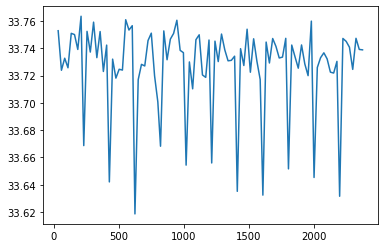

In [6]:
plt.plot(data_diff[:, idx_time], data_diff[:, idx_monitor])

In [7]:
def fit_plot(x, y, w, xlabel, ylabel, deg=2):
    p_coef = np.polyfit(x, y, deg, w=w)
    p = np.poly1d(p_coef)

    optima = -0.5 * p_coef[1]/p_coef[0]
    print('Optima of the parabola at:', optima)

    plt.errorbar(x, y, yerr=1/w, fmt = 'o',color = 'orange', 
            ecolor = 'red', elinewidth = 2, capsize=2)
    plt.plot(x, p(x))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return optima


Do a weighted fit, w[i]= 1/std

Optima of the parabola at: -101.7035863565294


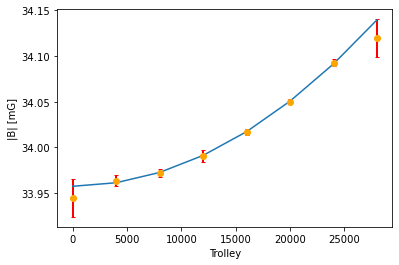

In [8]:
trolley = data_diff[:, idx_trolley]
bmag = np.sqrt(data_diff[:, idx_bfx]**2 + data_diff[:, idx_bfy]**2 + data_diff[:, idx_bfz]**2)


bmag_averaged = [np.mean(bmag[np.where(trolley==trolley[i])[0]]) for i in range(8)]
weights = 1/np.array([np.std(bmag[np.where(trolley==trolley[i])[0]]) for i in range(8)])

optima = fit_plot(trolley[:8], bmag_averaged, weights, 'Trolley', '|B| [mG]')

In [9]:
off = (0 - optima) * trolley_to_radius
print('Off from min trolley[cm]: ', off)

Off from min trolley[cm]:  0.07695571367644058


VERTICAL CALIBRATION

In [10]:
# Modify only here
data_name = '04-18-2022_18-00_z_calibrate'


data_path = 'data/calibration_runs/' + data_name
data = np.loadtxt(data_path + '/output.txt')

data_on = data[::2]
data_off = data[1::2]

data_diff = data_on
data_diff[:, idx_bfx] = data_on[:, idx_bfx] - data_off[:, idx_bfx]
data_diff[:, idx_bfy] = data_on[:, idx_bfy] - data_off[:, idx_bfy]
data_diff[:, idx_bfz] = data_on[:, idx_bfz] - data_off[:, idx_bfz]
data_diff[:, idx_monitor] = data_on[:, idx_monitor] - data_off[:, idx_monitor]

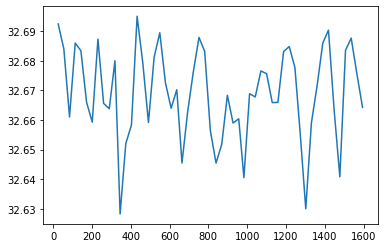

In [11]:
plt.plot(data_diff[:, idx_time], data_diff[:, idx_monitor])

Optima of the parabola at: -17801.375175511315


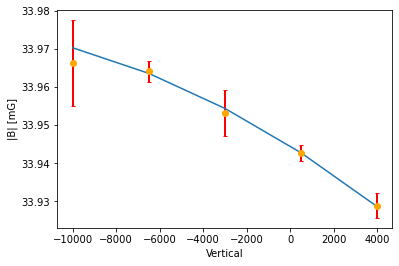

In [12]:
vertical = data_diff[:, idx_vertical]
bmag = np.sqrt(data_diff[:, idx_bfx]**2 + data_diff[:, idx_bfy]**2 + data_diff[:, idx_bfz]**2)


number_points = 5

bmag_averaged = [np.mean(bmag[np.where(vertical==vertical[i])[0]]) for i in range(number_points)]
weights = 1/np.array([np.std(bmag[np.where(vertical==vertical[i])[0]]) for i in range(number_points)])

optima = fit_plot(vertical[:5], bmag_averaged, weights, 'Vertical', '|B| [mG]')